<a href="https://colab.research.google.com/github/alexandreib/QuantDesign/blob/main/SP500_Tickers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Portfolio Optimization on S&P 500 Stocks**




Imports :


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

# Download the Stocks Returns


## Scraping SP500 Tickers

In [2]:
# Download the S&P 500 constituents from Wikipedia
try:
    table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    df = table[0]
    tickers = df['Symbol'].tolist()
except Exception as e:
    print(f"Error downloading S&P 500 tickers: {e}")
    tickers = [] # Handle the error gracefully, e.g., provide a default list

# Print or use the tickers list
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMTM', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', '

## Download the last 20 years of price

In [3]:
# Define the start and end dates for the data
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365 * 10)

# Download the data
df = yf.download(tickers, start=start_date, end=end_date)

# Print the data (optional)
df.head()

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-11-10 01:02:52.908958 -> 2024-11-07 01:02:52.908958)')


Price                      Adj Close                                        \
Ticker                             A       AAPL       ABBV ABNB        ABT   
Date                                                                         
2014-11-10 00:00:00+00:00  38.284248  24.262487  42.174763  NaN  36.439301   
2014-11-11 00:00:00+00:00  38.404106  24.456446  42.214436  NaN  36.571545   
2014-11-12 00:00:00+00:00  38.210522  24.802004  42.154934  NaN  36.554996   
2014-11-13 00:00:00+00:00  38.210522  25.152016  42.068981  NaN  36.852535   
2014-11-14 00:00:00+00:00  38.321144  25.455215  42.313606  NaN  36.207893   

Price                                                                  \
Ticker                          ACGL        ACN       ADBE        ADI   
Date                                                                    
2014-11-10 00:00:00+00:00  19.086666  71.345367  71.699997  40.827507   
2014-11-11 00:00:00+00:00  19.110001  71.158829  71.699997  40.600777   
2014-11-12 00:00:00+00:00  19.139999  71.311424  71.410004  40.697948   
2014-11-13 00:00:00+00:00  19.200001  71.582718  71.720001  40.657463   
2014-11-14 00:00:00+00:00  19.100000  71.752235  71.419998  40.989471   

Price                                 ...  Volume                             \
Ticker                           ADM  ...     WTW       WY     WYNN      XEL   
Date                                  ...                                      
2014-11-10 00:00:00+00:00  38.374908  ...  309814  2233600  1034000  3284100   
2014-11-11 00:00:00+00:00  38.639465  ...  291505  2212500  1296400  2469700   
2014-11-12 00:00:00+00:00  38.329552  ...  324537  4874700  2121700  3203100   
2014-11-13 00:00:00+00:00  38.405151  ...  240769  1644200  1294400  2690900   
2014-11-14 00:00:00+00:00  38.813309  ...  181917  2878300  1279700  2794100   

Price                                                                  \
Ticker                          XOM      XYL      YUM     ZBH    ZBRA   
Date                                                                    
2014-11-10 00:00:00+00:00   9087600   625800  3756396  826163  318300   
2014-11-11 00:00:00+00:00   7990000   534600  2132959  585555  293800   
2014-11-12 00:00:00+00:00  11592800   762500  3970331  806490  333500   
2014-11-13 00:00:00+00:00  12355400  1109100  5418501  836154  496700   
2014-11-14 00:00:00+00:00   9352500  1101500  3379017  723781  559200   

Price                                
Ticker                          ZTS  
Date                                 
2014-11-10 00:00:00+00:00   7530100  
2014-11-11 00:00:00+00:00  20228500  
2014-11-12 00:00:00+00:00  21414900  
2014-11-13 00:00:00+00:00   6151300  
2014-11-14 00:00:00+00:00   2689500  

[5 rows x 3018 columns]

## Reshape, and Clean the DataFrame

In [4]:
# Reshape the DataFrame
df = df['Adj Close'].reset_index()
df = pd.melt(df, id_vars='Date', value_vars=tickers, var_name='Ticker', value_name='Adj Close')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.rename(columns={'index': 'Ticker'})

# Print or use the transformed DataFrame
df.head()

,Date,Ticker,Adj Close
0,2014-11-10,MMM,94.098473
1,2014-11-11,MMM,93.770226
2,2014-11-12,MMM,94.110420
3,2014-11-13,MMM,94.510307
4,2014-11-14,MMM,94.808754


# Prepare the Returns

Stationarity is a property of a time series, while homoscedasticity is a property of the residuals in a regression model:
Stationarity
A time series is stationary if its mean, variance, and autocovariance do not change over time.
Homoscedasticity
A regression model has homoscedasticity if the variance of the residuals, or error term, is constant.
Stationarity has three main criteria:
Mean: The mean of the series should be constant, not a function of time.
Variance: The variance of the series should be constant, not a function of time. This property is called homoscedasticity.
Covariance: The covariance between sequential data points should not be a function of time.
In a regression model, heteroscedasticity occurs when the residuals have unequal variance. This can be seen on a residuals versus fitted value plot, where heteroscedasticity appears as a cone shape.

## Log Returns

Using log returns instead of simple returns offers several advantages:

- **Time Additivity:**  
  Log returns can be summed over different periods for cumulative return calculations, unlike simple returns.

- **Compounding:**  
  Log returns naturally account for compounding, providing a more accurate measure of investment growth.

- **Normality Assumption:**  
  Log returns are often more normally distributed, aiding statistical modeling and risk management.

- **Symmetry:**  
  Log returns treat gains and losses symmetrically, better reflecting the continuous nature of returns.


In [5]:
# Calculate daily log returns
df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# # Calculate quarterly log returns Using the first advantage of log Rturns : Tie Additivity
df['Quarterly_Log_Return'] = df.groupby('Ticker')['Log_Return'].rolling(window=63).sum().reset_index(0,drop=True)

# Drop rows where 'Daily_Log_Return' is NaN
df = df.dropna(subset=['Quarterly_Log_Return']).reset_index(drop = True)

df.head()

,Date,Ticker,Adj Close,Log_Return,Quarterly_Log_Return
0,2015-02-11,MMM,99.309731,-0.001913,0.053902
1,2015-02-12,MMM,100.173172,0.008657,0.066053
2,2015-02-13,MMM,100.191307,0.000181,0.062613
3,2015-02-17,MMM,100.782974,0.005888,0.064261
4,2015-02-18,MMM,101.072784,0.002871,0.063979


In [6]:
# Calculate RSI (Relative Strength Index)
delta = df.groupby('Ticker')['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df.loc[:, 'RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD (Moving Average Convergence Divergence)
EMA12 = df.groupby('Ticker', group_keys = False)['Adj Close'].apply(lambda x: x.ewm(span=12).mean())
EMA26 = df.groupby('Ticker', group_keys = False)['Adj Close'].apply(lambda x: x.ewm(span=26).mean())
df.loc[:, 'MACD'] = EMA12 - EMA26
df.loc[:, 'Signal_Line'] = df.groupby('Ticker', group_keys = False)['MACD'].apply(lambda x: x.ewm(span=9, adjust=False).mean())

# Calculate daily variation (standard deviation) for all tickers on Log_Return
df.loc[:, 'Daily_std'] = df.groupby('Date', group_keys = False)['Log_Return'].apply(lambda x: x.rolling(window=1).std())
df.loc[:, 'Daily_mean'] = df.groupby('Date', group_keys = False)['Log_Return'].apply(lambda x: x.rolling(window=1).mean())
df.loc[:, 'Daily_min'] = df.groupby('Date', group_keys = False)['Log_Return'].apply(lambda x: x.rolling(window=1).min())
df.loc[:, 'Daily_max'] = df.groupby('Date', group_keys = False)['Log_Return'].apply(lambda x: x.rolling(window=1).max())

# Calculate rolling min, max, mean, and variance
for col in ['Daily_mean', 'Log_Return'] :
    df.loc[:, f'Rolling_{col}_Min'] = df.groupby('Ticker', group_keys = False)[col].apply(lambda x: x.rolling(window=20).min())
    df.loc[:, f'Rolling_{col}_Max'] = df.groupby('Ticker', group_keys = False)[col].apply(lambda x: x.rolling(window=20).max())
    df.loc[:, f'Rolling_{col}_Mean'] = df.groupby('Ticker', group_keys = False)[col].apply(lambda x: x.rolling(window=20).mean())
    df.loc[:, f'Rolling_{col}_Variance'] = df.groupby('Ticker', group_keys = False)[col].apply(lambda x: x.rolling(window=20).var())

df = df.fillna(0)
df.head()

,Date,Ticker,Adj Close,Log_Return,Quarterly_Log_Return,RSI,MACD,Signal_Line,Daily_std,Daily_mean,Daily_min,Daily_max,Rolling_Daily_mean_Min,Rolling_Daily_mean_Max,Rolling_Daily_mean_Mean,Rolling_Daily_mean_Variance,Rolling_Log_Return_Min,Rolling_Log_Return_Max,Rolling_Log_Return_Mean,Rolling_Log_Return_Variance
0,2015-02-11,MMM,99.309731,-0.001913,0.053902,0.0,0.000000,0.000000,0.0,-0.001913,-0.001913,-0.001913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-02-12,MMM,100.173172,0.008657,0.066053,0.0,0.019372,0.003874,0.0,0.008657,0.008657,0.008657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-02-13,MMM,100.191307,0.000181,0.062613,0.0,0.025246,0.008149,0.0,0.000181,0.000181,0.000181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-02-17,MMM,100.782974,0.005888,0.064261,0.0,0.048661,0.016251,0.0,0.005888,0.005888,0.005888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-02-18,MMM,101.072784,0.002871,0.063979,0.0,0.071892,0.027379,0.0,0.002871,0.002871,0.002871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import sklearn
import sklearn.linear_model

In [8]:
lr = sklearn.linear_model.LinearRegression()

In [9]:
dates = list(df['Date'].unique())
number_of_dates = len(dates)

dates_train = dates[:int(number_of_dates*0.8)]
dates_valid = dates[int(number_of_dates*0.8):]
LabelEncoder =  { x : i for i, x in enumerate(df['Ticker'].unique())}
LabelDecoder =  { x : i for i, x in LabelEncoder.items()}
df['Ticker'] = df['Ticker'].map(LabelEncoder)

Y_train = df[df['Date'].isin(dates_train)]['Quarterly_Log_Return']
X_train = df[df['Date'].isin(dates_train)].drop(columns = ['Date', 'Adj Close', 'Log_Return', 'Quarterly_Log_Return'])

Y_valid = df[df['Date'].isin(dates_valid)]['Quarterly_Log_Return']
X_valid = df[df['Date'].isin(dates_valid)].drop(columns = ['Date', 'Adj Close', 'Log_Return', 'Quarterly_Log_Return'])



In [10]:
lr.fit(X_train,Y_train)

LinearRegression()

In [11]:
Y_pred = lr.predict(X_valid)

In [12]:
np.sqrt(np.sum((Y_pred-Y_valid)**2))

67.1330391426044

In [13]:
X_valid['Y_pred'] = Y_pred
X_valid['Y_valid'] = Y_valid

X_valid['Error'] = Y_pred - Y_valid


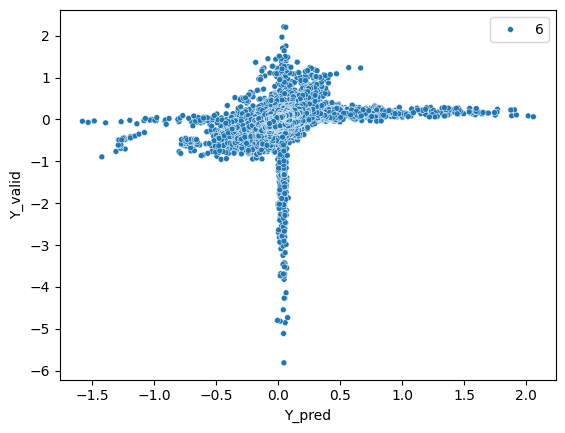

In [14]:
sns.scatterplot(data = X_valid, x = 'Y_pred', y = 'Y_valid', size = 6)
plt.show()